# Chapter 5: Training Neural Network
## Lab 5: Weight Initialization and Batch Normalization

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/taipeitechmmslab/MMSLAB-DL/blob/master/Lab5.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

### Weight Initialization (for analyzing the results in Section 5.2)


### Import packages

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from preprocessing import parse_aug_fn, parse_fn

### Activation Function 

1. ReLU

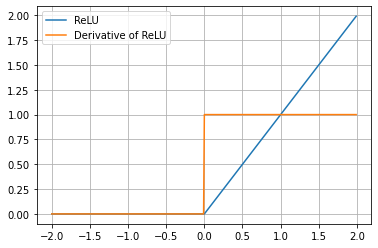

In [3]:
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, x, 0)
plt.plot(x, y, label='ReLU')
plt.grid(True)
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, 1, 0)
plt.plot(x, y, label='Derivative of ReLU')
plt.grid(True)
plt.legend(loc='upper left')

2. Sigmoid

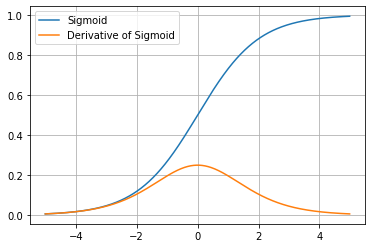

In [4]:
x1 = np.arange(-5, 5, 0.01)
y1 = 1 / (1 + np.exp(-x1))
plt.plot(x1, y1, label='Sigmoid')
plt.grid(True)
x2 = np.arange(-5, 5, 0.01)
y2 = (1 / (1 + np.exp(-x2))) * (1 - (1 / (1 + np.exp(-x2))))
plt.plot(x2, y2, label='Derivative of Sigmoid')
plt.grid(True)
plt.legend(loc='upper left')

3. Tanh

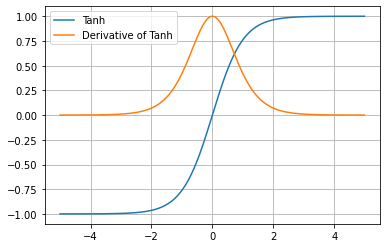

In [5]:
x = np.arange(-5, 5, 0.01)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x, y, label='Tanh')
plt.grid(True)
x = np.arange(-5, 5, 0.01)
y = 1 - np.square((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))
plt.plot(x, y, label='Derivative of Tanh')
plt.grid(True)
plt.legend(loc='upper left')

### Weight initialization

#### 1. RandomNormal (std 1 )

    To build the network model, the following network layers are used:

-	keras.Input: Input layer with shape of (100,)

-	layers.Dense (fully connected layer): Sigmoid is used as activation function, normal distribution with a standard deviation of 1 is employed for weight initialization, bias is not used.


In [6]:
# building network
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x4)
model_1 = keras.Model(inputs, [x1, x2, x3, x4, x5])

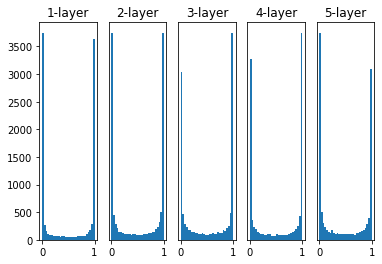

In [7]:
# Displaying the output distribution of each layer

x = np.random.randn(100, 100)
outputs = model_1.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # Choose which cell to display in the table
    plt.title(str(i+1) + "-layer")  # Set the title of the histogram
    if i != 0: plt.yticks([], [])  # Show only the y-axis of the first column of histograms
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # Draw a histogram
plt.show()

#### 2. RandomNormal (std 0.05 )

    To build the network model, the following network layers are used:

-	keras.Input: Input layer with shape of (100,)

-	layers.Dense (fully connected layer): Sigmoid is used as activation function, normal distribution with a standard deviation of 0.01 is employed for weight initialization, bias is not used.


In [8]:
# building network
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x4)
model_2 = keras.Model(inputs, [x1, x2, x3, x4, x5])

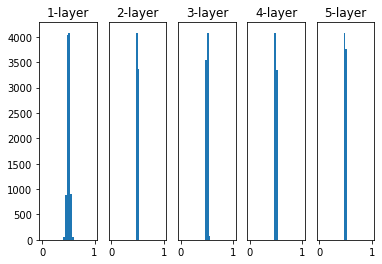

In [9]:
# Displaying the output distribution of each layer

x = np.random.randn(100, 100)
outputs = model_2.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # Choose which cell to display in the table
    plt.title(str(i+1) + "-layer")  # Set the title of the histogram
    if i != 0: plt.yticks([], [])  # Show only the y-axis of the first column of histograms
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # Draw a histogram
plt.show()

#### 3. Xavier/Glorot Initialization (Sigmoid)

Glorot initialization method is proposed by Glorot et al. in 2010, which has been widely used in many deep neural networks and is regarded as the default weight initialization method for training network models in Keras. 

To build the network model, the following network layers are used:

-	keras.Input: Input layer with shape of (100,)

-	layers.Dense (fully connected layer): Sigmoid is used as activation function, Glorot method is employed for weight initialization, bias is not used.



In [11]:
#Building network
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x4)
model_3 = keras.Model(inputs, [x1, x2, x3, x4, x5])

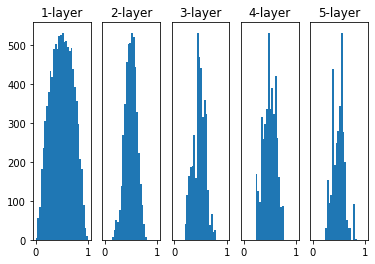

In [12]:
# Displaying the output distribution of each layer
x = np.random.randn(100, 100)
outputs = model_3.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # Choose which cell to display in the table
    plt.title(str(i+1) + "-layer")  # Set the title of the histogram
    if i != 0: plt.yticks([], [])  # Show only the y-axis of the first column of histograms
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # Draw a histogram
plt.show()

#### 4. Xavier/Glorot Initialization (ReLU)

To build the network model, the following layers are used:

-	keras.Input: Input layer with shape of (100,)

-	layers.Dense (fully connected layer): ReLU is used as activation function, Glorot is employed for weight initialization, bias is not used.


In [13]:
#Building network 
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x4)
model_4 = keras.Model(inputs, [x1, x2, x3, x4, x5])

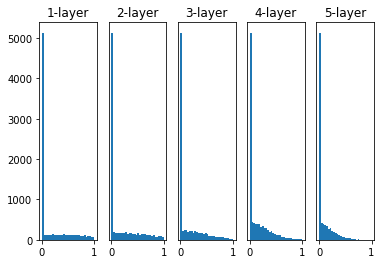

In [14]:
# Displaying the output distribution of each layer
x = np.random.randn(100, 100)
outputs = model_4.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  #  Choose which cell to display in the table
    plt.title(str(i+1) + "-layer")  # Set the title of the histogram
    if i != 0: plt.yticks([], [])  # Show only the y-axis of the first column of histograms
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # Draw a histogram
plt.show()

#### 5. He initialization

He initialization method was proposed by Kaiming He in 2015, which have proved effectively in preventing vanishing gradient problem when using the deep networks with the ReLU activation function. 

To build the network model, the following layers are used:

-	keras.Input: Input layer with shape of (100,)

-	layers.Dense (fully connected layer): ReLU is used as activation function, He is employed for weight initialization, bias is not used.


In [16]:
#Building network
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.he_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.he_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.he_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.he_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.he_normal())(x4)
model_5 = keras.Model(inputs, [x1, x2, x3, x4, x5])

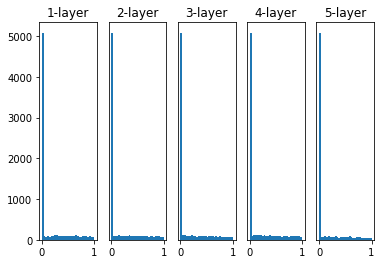

In [18]:
# Displaying the output distribution of each layer
x = np.random.randn(100, 100)
outputs = model_5.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # Choose which cell to display in the table
    plt.title(str(i+1) + "-layer")  # Set the title of the histogram
    if i != 0: plt.yticks([], [])  # Show only the y-axis of the first column of histograms
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # Draw a histogram
plt.show()

## Experiment 1: Verification of Three Weight Initialization Methods on CIFAR-10 Dataset


To verify the effectiveness of each weight initialization method, three scenarios of building neural networks are implemented including: 

1)	Model-1: A neural network with normal distribution initialization, using standard deviation of 0.01.

2)	Model-2: A neural network with Glorot weight initialization.

3)	Model-3: A neural network with He weight initialization. 

Model-1, Model-2, and Model-3 have the same architecture and use ReLU activation in the hidden layers. 

### Import packages

In [33]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers 
# Import “parse_aug_fn” function and “parse_fn” function from the preprocessing.py file
from preprocessing import parse_aug_fn, parse_fn

### Data reading and division 
•	Load CIFAR-10 dataset:

In [40]:
# Divide the training data with the rate of 1: 9 (1 for validation and 9 part for training)
train_split, valid_split = ['train[:90%]', 'train[90%:]']
# get the training data and read data information 
train_data, info = tfds.load("cifar10", split=train_split, with_info=True)
# get the valid data 
valid_data = tfds.load("cifar10", split=valid_split)
# get the test set of CIFAR-10
test_data = tfds.load("cifar10", split=tfds.Split.TEST)


### Data settings

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # Automatic adjustment mode
batch_size = 64  # Batch size
train_num = int(info.splits['train'].num_examples / 10) * 9  # Number of training data

train_data = train_data.shuffle(train_num)  # Shuffle the training data
# Training data 
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# Set batch size and turn on prefetch mode 
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# Validation data
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# Set batch size and turn on prefetch mode 
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# Test data
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# Set batch size and turn on prefetch mode 
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

### Building and training network models

•	Building network models: 

In [20]:
def build_and_train_model(run_name, init):
    """
    run_name: the name of the current executing task
    init: weight initialization method

    """
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(inputs)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=init)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu', kernel_initializer=init)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    # Create a network model (connect all the network layers that pass through from input to output)
    model = keras.Model(inputs, outputs)
    
    # Save training log
    logfiles = 'lab5-logs/{}-{}'.format(run_name, init.__class__.__name__)
    model_cbk = keras.callbacks.TensorBoard(log_dir=logfiles, 
                                            histogram_freq=1)
    # save the best weights of the model 
    modelfiles = model_dir + '/{}-best-model.h5'.format(run_name)
    model_mckp = keras.callbacks.ModelCheckpoint(modelfiles, 
                                                 monitor='val_categorical_accuracy', 
                                                 save_best_only=True, 
                                                 mode='max')
    
    # Set the optimizer, loss function, and metric function for training
    model.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])
    
    # Train the network model
    model.fit(train_data,
              epochs=100, 
              validation_data=valid_data,
              callbacks=[model_cbk, model_mckp])

In [21]:
session_num = 1
# Set storage weight directory
model_dir = 'lab5-logs/models/'
os.makedirs(model_dir)
# Set the three weight initialization methods
weights_initialization_list = [initializers.RandomNormal(0, 0.01),
                        initializers.glorot_normal(),
                        initializers.he_normal()]

for init in weights_initialization_list:
    print('--- Running training session %d' % (session_num))
    run_name = "run-%d" % session_num
    build_and_train_model(run_name, init)  # Create and train a network
    session_num += 1

--- Running training session 1
Epoch 1/100


W0613 17:04:39.261276 140675303655232 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


      1/Unknown - 8s 8s/step - loss: 2.3026 - categorical_accuracy: 0.1406

W0613 17:04:44.289539 140675303655232 callbacks.py:241] Method (on_train_batch_end) is slow compared to the batch update (0.109824). Check your callbacks.


704/704 [==============================] - 21s 30ms/step - loss: 2.1710 - categorical_accuracy: 0.1678 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 13s 18ms/step - loss: 2.0251 - categorical_accuracy: 0.2390 - val_loss: 1.9204 - val_categorical_accuracy: 0.2906
Epoch 3/100
704/704 [==============================] - 14s 20ms/step - loss: 1.9734 - categorical_accuracy: 0.2678 - val_loss: 1.8632 - val_categorical_accuracy: 0.3286
Epoch 4/100
704/704 [==============================] - 12s 18ms/step - loss: 1.9029 - categorical_accuracy: 0.2937 - val_loss: 1.7494 - val_categorical_accuracy: 0.3642
Epoch 5/100
704/704 [==============================] - 12s 17ms/step - loss: 1.8575 - categorical_accuracy: 0.3144 - val_loss: 1.6670 - val_categorical_accuracy: 0.3848
Epoch 6/100
704/704 [==============================] - 15s 21ms/step - loss: 1.8234 - categorical_accuracy: 0.3293 - val_loss: 1.5896 - val_categorical_accurac

704/704 [==============================] - 17s 25ms/step - loss: 1.1242 - categorical_accuracy: 0.6145 - val_loss: 0.8646 - val_categorical_accuracy: 0.6950
Epoch 98/100
704/704 [==============================] - 18s 25ms/step - loss: 1.1186 - categorical_accuracy: 0.6142 - val_loss: 0.8909 - val_categorical_accuracy: 0.6882
Epoch 99/100
704/704 [==============================] - 18s 25ms/step - loss: 1.1222 - categorical_accuracy: 0.6142 - val_loss: 0.8897 - val_categorical_accuracy: 0.6926
Epoch 100/100
704/704 [==============================] - 18s 26ms/step - loss: 1.1125 - categorical_accuracy: 0.6183 - val_loss: 0.8667 - val_categorical_accuracy: 0.6968
--- Running training session 2
Epoch 1/100
704/704 [==============================] - 21s 30ms/step - loss: 2.0774 - categorical_accuracy: 0.2085 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 18s 25ms/step - loss: 1.8964 - categorical_accuracy: 0.2985 - val_los

704/704 [==============================] - 12s 17ms/step - loss: 0.7922 - categorical_accuracy: 0.7351 - val_loss: 0.6495 - val_categorical_accuracy: 0.7958
Epoch 94/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7875 - categorical_accuracy: 0.7385 - val_loss: 0.6843 - val_categorical_accuracy: 0.7812
Epoch 95/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7911 - categorical_accuracy: 0.7377 - val_loss: 0.6865 - val_categorical_accuracy: 0.7842
Epoch 96/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7779 - categorical_accuracy: 0.7410 - val_loss: 0.6340 - val_categorical_accuracy: 0.8036
Epoch 97/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7941 - categorical_accuracy: 0.7349 - val_loss: 0.6557 - val_categorical_accuracy: 0.7970
Epoch 98/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7839 - categorical_accuracy: 0.7400 - val_loss: 0.6462 - val_categorical_accuracy: 

704/704 [==============================] - 12s 17ms/step - loss: 0.7448 - categorical_accuracy: 0.7559 - val_loss: 0.6218 - val_categorical_accuracy: 0.8018
Epoch 90/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7492 - categorical_accuracy: 0.7529 - val_loss: 0.6238 - val_categorical_accuracy: 0.8044
Epoch 91/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7287 - categorical_accuracy: 0.7591 - val_loss: 0.6150 - val_categorical_accuracy: 0.8050
Epoch 92/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7385 - categorical_accuracy: 0.7573 - val_loss: 0.6599 - val_categorical_accuracy: 0.7974
Epoch 93/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7449 - categorical_accuracy: 0.7571 - val_loss: 0.6348 - val_categorical_accuracy: 0.8064
Epoch 94/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7436 - categorical_accuracy: 0.7556 - val_loss: 0.6259 - val_categorical_accuracy: 

### Displaying results 

•	Load the best trained models: 

In [22]:
model_1 = keras.models.load_model('lab5-logs/models/run-1-best-model.h5')
model_2 = keras.models.load_model('lab5-logs/models/run-2-best-model.h5')
model_3 = keras.models.load_model('lab5-logs/models/run-3-best-model.h5')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)

    157/Unknown - 2s 10ms/step - loss: 0.6364 - categorical_accuracy: 0.8048 1s 9ms/ste

•	Verification on the test set:

In [23]:
loss = [loss_1, loss_2, loss_3]  
acc = [acc_1, acc_2, acc_3]

dict = {"Loss": loss,  
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,0.854636,0.7060
1,0.654435,0.7946
2,0.636442,0.8048


# Experiment 2: Verification of Batch Normalization

A neural network, named Model-4 is built by adding batch normalization to the convolutional layers of the network architecture in Experiment 1: Verification of Three Weight Initialization Methods”. The model_4 is trained on the CIFAR-10 dataset to verify the effeteness of Batch Normalization in improvement performance of neural network.  

The architecture of Model-4: 

-	Input layer with shape of (32, 32, 3).
-	Five convolutional layers, followed by Batch Normalization and ReLu activation function, respectively.
-	One max pooling layer.
-	One flatten layer for flattening the input into a one-dimensional Tensor.
-	One fully connected layer.
-	One dropout layer with a discard rate of 50%.
-	Output fully connected layer with 10 neurons, followed by softmax function.

In [39]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, (3, 3))(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(256, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(64, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(64)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)
# creating model-4
model_4 = keras.Model(inputs, outputs, name='model-4')
model_4.summary()  # show network architecture

Model: "model-4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 128)       512 

•	Set Callback function:

In [25]:
# # Save training log
log_dir = os.path.join('lab5-logs', 'run-4-batchnormalization')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# Store the best model weights 
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/run-4-best-model.h5', 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

•	Set the optimizer, loss function, and metric function.

In [26]:
model_4.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

•	Training Model-4

In [27]:
history_4 = model_4.fit(train_data,
                        epochs=100, 
                        validation_data=valid_data,
                        callbacks=[model_cbk, model_mckp])

Epoch 1/100
704/704 [==============================] - 35s 50ms/step - loss: 1.8649 - categorical_accuracy: 0.3316 - val_loss: 0.0000e+00 - val_categorical_accuracy: 0.0000e+00
Epoch 2/100
704/704 [==============================] - 27s 39ms/step - loss: 1.5226 - categorical_accuracy: 0.4618 - val_loss: 1.6555 - val_categorical_accuracy: 0.4566
Epoch 3/100
704/704 [==============================] - 28s 40ms/step - loss: 1.3684 - categorical_accuracy: 0.5218 - val_loss: 1.2505 - val_categorical_accuracy: 0.5728
Epoch 4/100
704/704 [==============================] - 27s 38ms/step - loss: 1.2729 - categorical_accuracy: 0.5578 - val_loss: 1.1574 - val_categorical_accuracy: 0.5860
Epoch 5/100
704/704 [==============================] - 28s 39ms/step - loss: 1.1960 - categorical_accuracy: 0.5859 - val_loss: 1.4321 - val_categorical_accuracy: 0.5130
Epoch 6/100
704/704 [==============================] - 28s 39ms/step - loss: 1.1375 - categorical_accuracy: 0.6075 - val_loss: 1.0611 - val_categor

704/704 [==============================] - 16s 23ms/step - loss: 0.4111 - categorical_accuracy: 0.8665 - val_loss: 0.4669 - val_categorical_accuracy: 0.8660
Epoch 98/100
704/704 [==============================] - 16s 23ms/step - loss: 0.4177 - categorical_accuracy: 0.8646 - val_loss: 0.4314 - val_categorical_accuracy: 0.8632
Epoch 99/100
704/704 [==============================] - 16s 23ms/step - loss: 0.4173 - categorical_accuracy: 0.8634 - val_loss: 0.5266 - val_categorical_accuracy: 0.8440
Epoch 100/100
704/704 [==============================] - 16s 23ms/step - loss: 0.4050 - categorical_accuracy: 0.8680 - val_loss: 0.4620 - val_categorical_accuracy: 0.8510


•	Verification on the test set：

In [30]:
model_4 = keras.models.load_model('lab5-logs/models/run-4-best-model.h5')
loss, acc = model_4.evaluate(test_data)
print('\nModel-4 Accuracy: {}%'.format(acc))

    157/Unknown - 6s 39ms/step - loss: 0.4311 - categorical_accuracy: 0.8644
Model-4 Accuracy: 0.8644000291824341%


### Compare the training results of the four networks

In [31]:
model_1 = keras.models.load_model('lab5-logs/models/run-1-best-model.h5')
model_2 = keras.models.load_model('lab5-logs/models/run-2-best-model.h5')
model_3 = keras.models.load_model('lab5-logs/models/run-3-best-model.h5')
model_4 = keras.models.load_model('lab5-logs/models/run-4-best-model.h5')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss_3, acc_3 = model_3.evaluate(test_data)
loss_4, acc_4 = model_4.evaluate(test_data)

    157/Unknown - 2s 14ms/step - loss: 0.4311 - categorical_accuracy: 0.8644

In [32]:
loss = [loss_1, loss_2, loss_3, loss_4]  
acc = [acc_1, acc_2, acc_3, acc_4]

dict = {"Loss": loss,  
        "Accuracy": acc}

df = pd.DataFrame(dict)
df

,Loss,Accuracy
0,0.854636,0.7060
1,0.654435,0.7946
2,0.636442,0.8048
3,0.431061,0.8644
